In [3]:
## Importing the required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

#To display all the columns of a dataframe
pd.pandas.set_option("display.max_columns",None)

In [4]:
# Reading the dataset and displaying the top 5 records

df=pd.read_csv(r"C:\Users\Ram Baldotra\Downloads\TCS Internship Dataset\train.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


# 1. Feature Engineering

## We don't have any missing values,Temporal variables (Year Variables )and categorical (text) variables in our dataset . So we will be only performing Feature Scaling .

##  Feature Scaling

### MinMaxScaler --> In this technique the value of each feature is scaled down between 0 to 1
formula=(X-X.min)/(X.max-X.min)

In [5]:
from sklearn.preprocessing import MinMaxScaler
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
# Except price_range column we are applying StandardScaler to all the features.

scaler=MinMaxScaler()
df_scaled=scaler.fit_transform(df.iloc[:,:-1])

In [7]:
## Making the DataFrame from the scaled features with same feature names.

df_scaled=pd.DataFrame(data=df_scaled,columns=df.columns[:-1])
df_scaled.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0


In [8]:
# Getting the additional information about df_scaled : (mean, std, min, 25 percentile, 50 percentile ,75 percentile , max) values from each feature

df_scaled.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.492664,0.4950,0.408900,0.509500,0.226816,0.521500,0.484621,0.446389,0.502075,0.502929,0.495825,0.329137,0.501679,0.499255,0.521893,0.320389,0.500611,0.761500,0.503000,0.507000
std,0.293533,0.5001,0.326402,0.500035,0.228497,0.499662,0.292673,0.320462,0.294997,0.326834,0.303216,0.226419,0.288518,0.289880,0.300946,0.242022,0.303553,0.426273,0.500116,0.500076
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.234302,0.0000,0.080000,0.000000,0.052632,0.000000,0.225806,0.111111,0.241667,0.285714,0.250000,0.144260,0.250167,0.254276,0.285714,0.111111,0.222222,1.000000,0.000000,0.000000
50%,0.484302,0.0000,0.400000,1.000000,0.157895,1.000000,0.483871,0.444444,0.508333,0.428571,0.500000,0.287755,0.498665,0.505211,0.500000,0.277778,0.500000,1.000000,1.000000,1.000000
75%,0.744322,1.0000,0.680000,1.000000,0.368421,1.000000,0.741935,0.777778,0.750000,0.857143,0.750000,0.483291,0.756342,0.750534,0.785714,0.500000,0.777778,1.000000,1.000000,1.000000
max,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Dividing the data into dependent and independent set

In [9]:
X=df.iloc[:,:-1]
Y=df["price_range"]

# 2. Feature Selection.

## 1. Removing Low Variance Features

In [10]:
from sklearn.feature_selection import VarianceThreshold

In [11]:
var_thres=VarianceThreshold(threshold=0.3)
var_thres.fit(df)
var_thres.get_support()

array([ True, False,  True, False,  True, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True])

In [12]:
df.columns[var_thres.get_support()]

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'mobile_wt',
       'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w',
       'talk_time', 'price_range'],
      dtype='object')

In [13]:
removed_features=[column for column in df.columns if column  not in df.columns[var_thres.get_support()]]
removed_features

# removed features contains the list of features that we will remove while model building

['blue', 'dual_sim', 'four_g', 'm_dep', 'three_g', 'touch_screen', 'wifi']

## 2. Removing Features based on High Correlation

In [14]:
corr=df.corr()
corr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


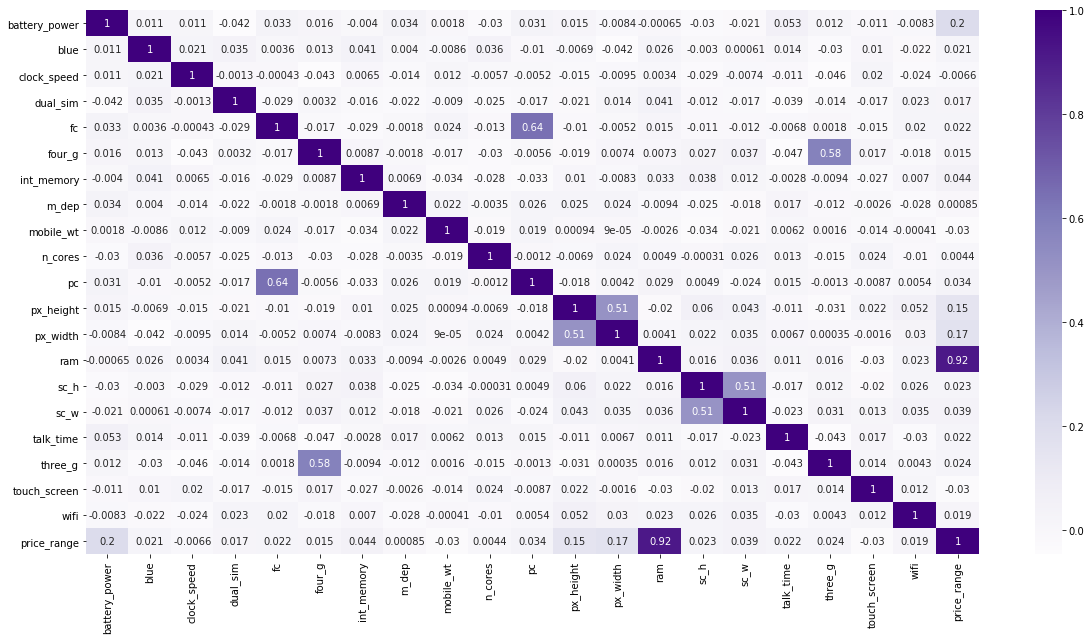

In [15]:
plt.figure(figsize=(20,10))
sn.heatmap(corr,cmap="Purples",annot=True)

In [16]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [17]:
col_corr=correlation(df.iloc[:,:-1],0.5)
col_corr

## col_corr contains the list of features that we will remove while model building

{'pc', 'px_width', 'sc_w', 'three_g'}

### So with correlation we got these four independent features that we will be removing while building our model

## 3. Mutual information for classification

In [18]:
## It uses information gain formula and returns the dependencies values for ecah of the features and those features that are 
## having high dependencies on output variable , we will be selecting them at the time of model building. 

In [19]:
from sklearn.feature_selection import mutual_info_classif

In [20]:
mu=mutual_info_classif(X,Y)
mu=pd.Series(mu,index=X.columns)
mu.sort_values(ascending=False)

## Below we have the Series of features in descending order of the dependencies on output variable

ram              0.844464
px_height        0.030970
battery_power    0.028272
px_width         0.025652
sc_h             0.011259
mobile_wt        0.008772
sc_w             0.005945
blue             0.002582
n_cores          0.000212
touch_screen     0.000000
three_g          0.000000
talk_time        0.000000
pc               0.000000
m_dep            0.000000
int_memory       0.000000
four_g           0.000000
fc               0.000000
dual_sim         0.000000
clock_speed      0.000000
wifi             0.000000
dtype: float64

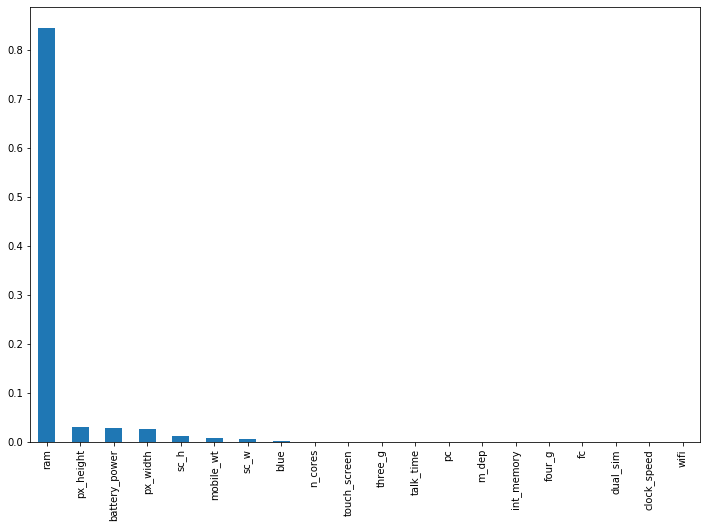

In [21]:
plt.figure(figsize=(12,8))
mu.sort_values(ascending=False).plot.bar()

In [22]:
## mutual_info contains the Features that this technique will give

mutual_info=list(mu.sort_values(ascending=False).index[:12])

m=list(mu.sort_values(ascending=False).index[12:])
m
## m contains the list of features that we will remove while building model

['pc',
 'm_dep',
 'int_memory',
 'four_g',
 'fc',
 'dual_sim',
 'clock_speed',
 'wifi']

## 4. Chi2 Test

In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [24]:
## Chi2 Test returns two values: 1. Scores and 2. p-values
## The lesser the p_vales , more important the feature is and the higher the scores, more important the feature is.

scores,p_values=chi2(X,Y)

In [25]:
p_value=pd.Series(p_values,index=X.columns)
p_value.sort_values()

## We have sorted the features with p_values in ascending order(i.e The important features are having lowest p_values)

battery_power    0.000000e+00
ram              0.000000e+00
px_width         0.000000e+00
px_height        0.000000e+00
mobile_wt        1.140850e-20
int_memory       2.371978e-19
sc_w             9.037659e-04
talk_time        4.152292e-03
fc               1.745143e-02
sc_h             2.214014e-02
pc               2.691680e-02
n_cores          2.802156e-02
touch_screen     5.873935e-01
four_g           6.773005e-01
m_dep            8.623774e-01
blue             8.677263e-01
clock_speed      8.852762e-01
dual_sim         8.892979e-01
wifi             9.356422e-01
three_g          9.547485e-01
dtype: float64

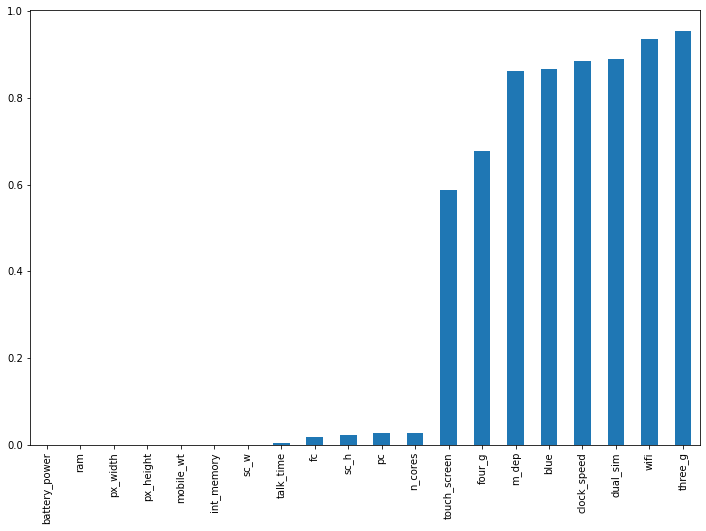

In [26]:
plt.figure(figsize=(12,8))
p_value.sort_values().plot.bar()

In [27]:
p=list(p_value.sort_values().index[12:])
p

## p contains the list of features that we will remove while building model.(in the right from m_dep to three_g)

['touch_screen',
 'four_g',
 'm_dep',
 'blue',
 'clock_speed',
 'dual_sim',
 'wifi',
 'three_g']

## 5. Feature Importance

In [28]:
from sklearn.ensemble import ExtraTreesClassifier

In [29]:
et=ExtraTreesClassifier()
et.fit(X,Y)

ExtraTreesClassifier()

In [30]:
ser=pd.Series(et.feature_importances_,index=X.columns)

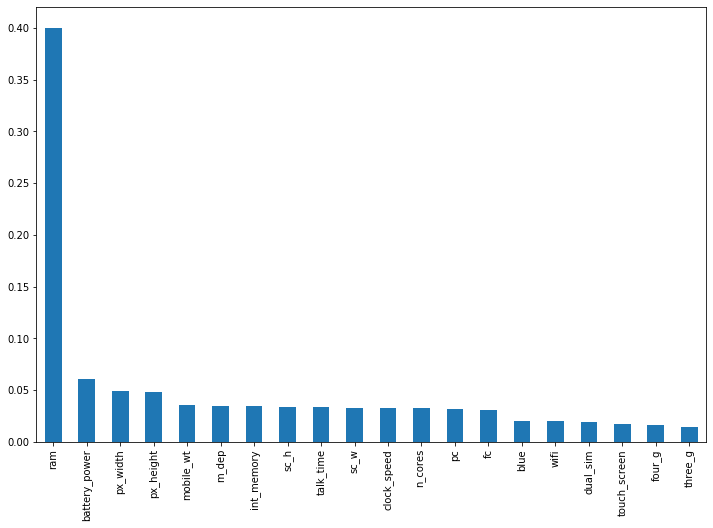

In [31]:
plt.figure(figsize=(12,8))
ser.sort_values(ascending=False).plot.bar()

In [32]:
s=list(ser.sort_values(ascending=False).index[14:])
s

## s contains the list of features that we will remove while building model.

['blue', 'wifi', 'dual_sim', 'touch_screen', 'four_g', 'three_g']

### Here we have performed Feature Scaling and different Feature Selection Techniques and accordingly we will built our models to see whether which Feature Selection Technique works good for different type of models.